In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats


In [2]:
mainDF = pd.read_csv("TD_Sterling offspring genotypes for Colony header.csv", sep = ',')
mainDF.shape

(54, 133)

## Marking for parent values 
#### changing data so we can see each parent separetely

In [3]:
mainDF['Father'] = mainDF['Sample'].apply(lambda x :sum(map(ord, x.split('x')[0])) )
mainDF['Father'] = (mainDF['Father'] - mainDF['Father'].mean())/mainDF["Father"].std(ddof=0)
mainDF['Father'] = mainDF['Father'].apply(lambda x : (x+2)*50)
mainDF['Mother'] = mainDF['Sample'].apply(lambda x : sum(map(ord, x.split('x')[1])))

mainDF.head()

,Sample,Pop,Actm110i262,Actm110i266,Actm110i291,Actm110i292,Actm110i295,Actm110i296,Actm110i299,Actm110i301,...,Atr117i265,Atr117i277,Atr1101i132,Atr1101i136,Atr1101i140,Atr1101i144,Atr1101i148,Atr1101i152,Father,Mother
0,y243x7219015,Pop1,1,1,0,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,361
1,y243x7219016,Pop1,1,0,1,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,362
2,y243x7219017,Pop1,1,1,1,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,363
3,y243x3d09015,Pop1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,1,0,182.821688,406
4,y243x3d09016,Pop1,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,182.821688,407


## Getting  of matrix values for PCA

#### X for values
#### Y for classes

In [4]:
X = mainDF.iloc[:,2:-2].values
Y = mainDF.iloc[:, -2:].values


## Calculating PCAS and adding them to the dataframe

In [5]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
PCvalues = sklearn_pca.fit_transform(X)
mainDF["PC1"] = pd.Series(PCvalues[:,0], index = mainDF.index)
mainDF["PC2"] = pd.Series(PCvalues[:,1], index = mainDF.index)
mainDF = mainDF.sort_index(ascending = False, axis= 1)
mainDF.head()


,Sample,Pop,PC2,PC1,Mother,Father,Atr117i277,Atr117i265,Atr117i245,Atr117i241,...,Actm110i307,Actm110i303,Actm110i301,Actm110i299,Actm110i296,Actm110i295,Actm110i292,Actm110i291,Actm110i266,Actm110i262
0,y243x7219015,Pop1,0.698273,-1.633485,361,182.821688,0,0,1,0,...,0,1,0,1,0,0,1,0,1,1
1,y243x7219016,Pop1,1.429142,-1.991206,362,182.821688,0,0,1,0,...,0,0,0,1,0,0,1,1,0,1
2,y243x7219017,Pop1,0.786280,-2.269844,363,182.821688,0,0,0,0,...,1,0,0,1,0,0,1,1,1,1
3,y243x3d09015,Pop1,0.870038,-1.503038,406,182.821688,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
4,y243x3d09016,Pop1,1.110871,-1.320055,407,182.821688,0,0,1,0,...,0,0,0,1,0,0,1,1,0,1


Text(0.5,1,'PCA Analysis')

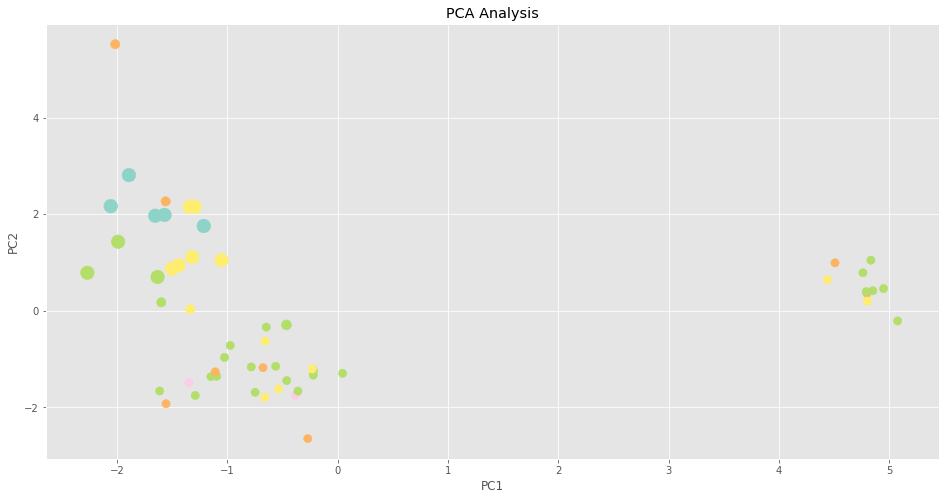

In [6]:
mainDF.plot.scatter('PC1', 'PC2',   s = mainDF['Father'], c = "Mother", cmap = 'Set3',colorbar = False)
plt.title("PCA Analysis")

## Calculating TSNE and adding them to the dataframe

Text(0.5,1,'tSNE analysis')

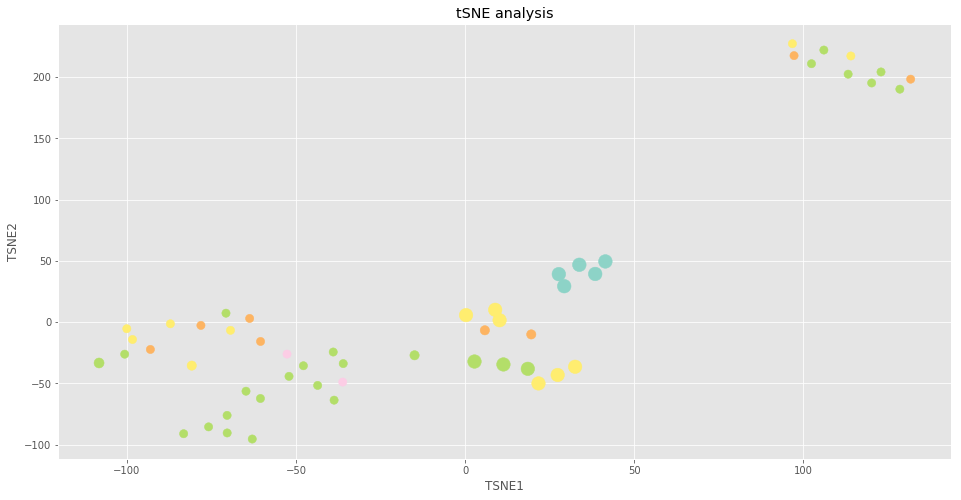

In [9]:
from sklearn.manifold import TSNE
TSNEvalues = TSNE(n_components=2,  perplexity=7.0).fit_transform(X)
mainDF["TSNE1"] = pd.Series(TSNEvalues[:,0], index = mainDF.index)
mainDF["TSNE2"] = pd.Series(TSNEvalues[:,1], index = mainDF.index)
mainDF = mainDF.sort_index(ascending = False, axis= 1)
mainDF.plot.scatter('TSNE1', 'TSNE2', s = mainDF['Father'], c = "Mother", cmap = 'Set3', colorbar = False)
plt.title("tSNE analysis")

## Testing diferent values for perplexity

In [8]:
for i in range(25):
    TSNEvalues = TSNE(n_components=2,  perplexity=i).fit_transform(X)
    mainDF["TSNE1 nc="+ str(i) ] = pd.Series(TSNEvalues[:,0], index = mainDF.index)
    mainDF["TSNE2 nc="+ str(i) ] = pd.Series(TSNEvalues[:,1], index = mainDF.index)
    mainDF = mainDF.sort_index(ascending = False, axis= 1)
    mainDF.plot.scatter("TSNE1 nc="+ str(i), "TSNE2 nc="+ str(i) , s = mainDF['Father'], c = "Mother", cmap = 'Set3', colorbar = False)
    plt.title("tSNE analysis with perplexity set as "+ str(i))
    plt.savefig("images_for_video/tSNE analysis perplexity"+ str(i)+'.png')
    plt.close()
#system("convert images_for_video/*.png  -delay 8 images_for_video/animation.mp4")
#system('rm -f images_for_video/*.png')

## Testing ML algoritmns 

In [10]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [84]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    GaussianNB()]

In [85]:
XPCA = PCvalues
XtSNE = TSNEvalues

from sklearn import preprocessing
lef = preprocessing.LabelEncoder()
lem = preprocessing.LabelEncoder()
YF = mainDF["Father"].values
YM = mainDF['Mother'].values
lef.fit(YF)
lem.fit(YM)
YF = lef.transform(YF)
YM = lem.transform(YM)
print(YF, YM)



datasets = [(XPCA, YF), (XtSNE, YF)]

[3 3 3 3 3 3 3 3 3 2 1 1 1 1 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [13 14 15 25 26 27 26 27 28 14  8  9 22 10  0  1  2  3  4 19 11 12 13 14 15
 16 17 18 19 17  9 10 11 12 13 14 15 16 17  5  6  7  8  9 10 11 12 13 20 21
 22 23 24 25]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


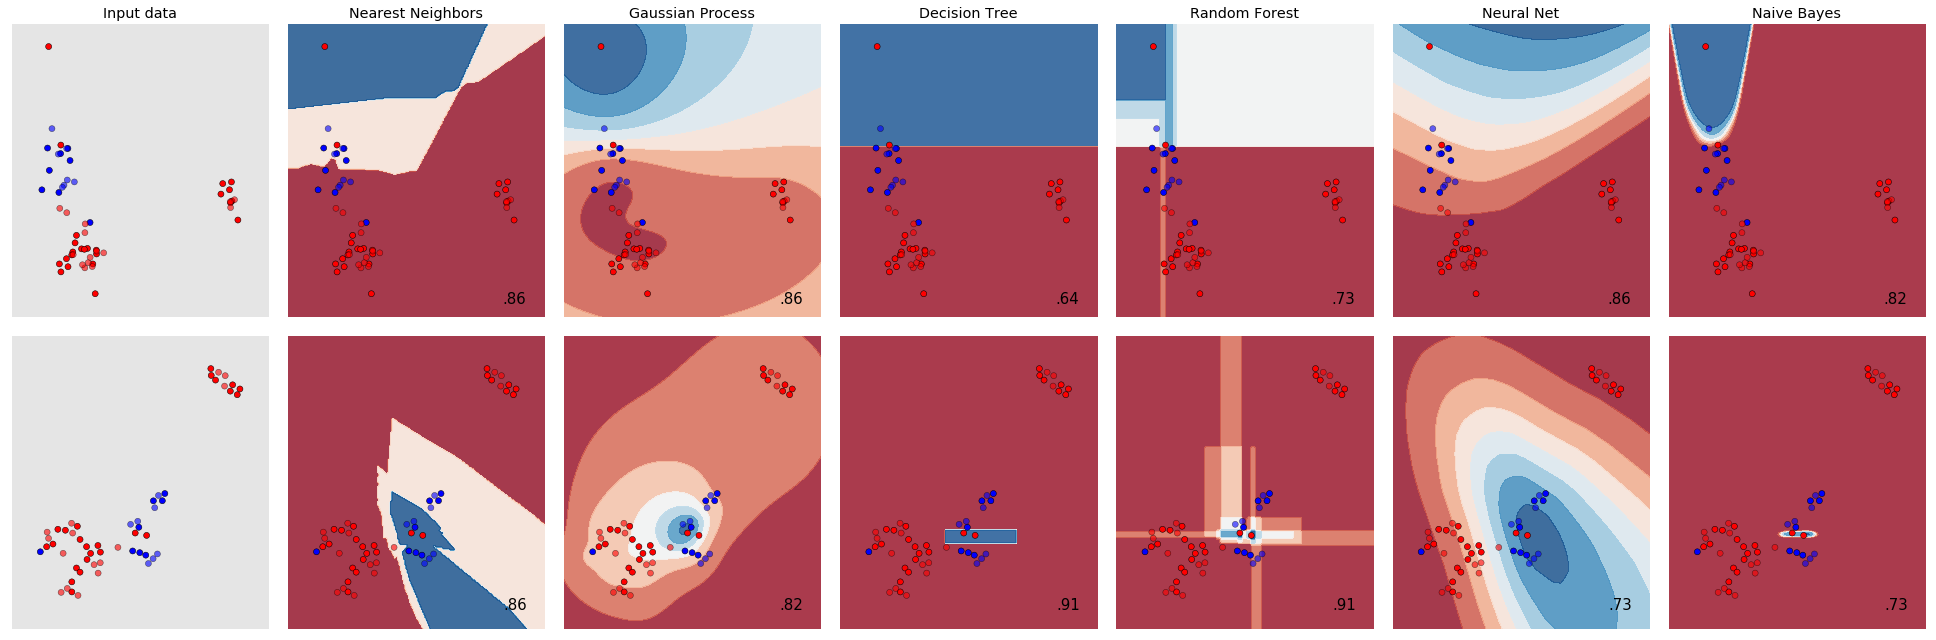

In [88]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.savefig("TESTING ML OUTPUT.png", DPI = 400)
plt.show()
